In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# read the data
df = pd.read_csv('/content/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,...,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


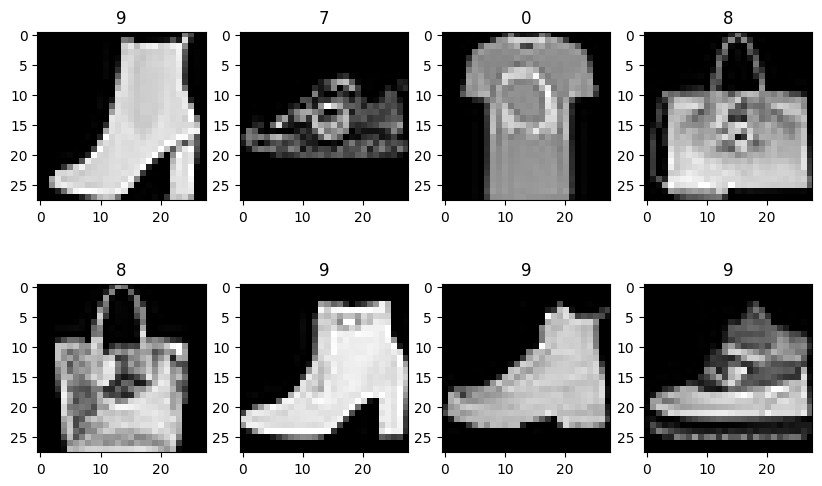

In [8]:
# label is the output having 10 diff classes

# plotting some of them

fig,axes = plt.subplots(2,4,figsize=(10,6))
for i,ax in enumerate(axes.flat):
  ax.imshow(df.iloc[i,1:].values.reshape(28,28),cmap='gray')
  ax.set_title(df.iloc[i,0])
plt.show()

In [9]:
# train test split
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=10)

In [10]:
# scaling the features
x_train = x_train/255
x_test = x_test/255

In [15]:
# create custom dataset class
class CustomDataset(Dataset):

  def __init__(self,features,labels):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]

In [18]:
# Creating train and test DATASET
train_dataset = CustomDataset(x_train.values,y_train.values)
test_dataset = CustomDataset(x_test.values,y_test.values)

In [26]:
train_dataset[6]  # shows the dataset of 1st image and its label in a tuple

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.1412, 0.5216, 0.7373, 0.4510, 0.2706, 0.2784, 0.4196, 0.7294, 0.6431,
         0.1137, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0314, 0.5922,
         0.9569, 0.9569, 0.9529, 0.9294, 0.9804, 0.9725, 0.9647, 0.9843, 0.9451,
         0.9451, 0.9451, 0.9608, 0.5686, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0196, 0.0000, 0.0902, 0.8980,
         0.9961, 0.9373, 0.9059, 0.9333, 0.9490, 0.9451, 0.9529, 0.9529, 0.9490,
         0.9529, 0.9098, 0.8941, 0.9294, 0.9961, 0.8706, 0.0941, 0.0000, 0.0118,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6627,
         0.9804, 0.8784, 0.9098, 0.9216, 0.7529, 0.5725, 0.5098, 0.3843, 0.3686,
         0.3686, 0.5333, 0.9451, 0.9451, 0.9020, 0.8824, 0.9765, 0.6784, 0.0000,
         0.0000, 0.0000, 0.0

In [27]:
# create TRAIN and TEST DATA LOADER
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False) # during the testing phase data should not shuffle

In [33]:
# define NN class

# in this-> 1st layer: 784 conn enters and 128 exits activation fn is ReLU and so on....

class nn_model(nn.Module):
  def __init__(self,num_features):
    super(nn_model,self).__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,features):
    return self.model(features)

In [29]:
# learning rate and epochs
epochs = 100
lr = 0.1

In [34]:
# obj of class , loss fn , optimizer
model = nn_model(x_train.shape[1])
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=lr)

In [ ]:
# training loop
for i in range(epochs):
  total_loss = 0
  for batch_features, batch_labels in train_loader:
    # forward pass
    output = model(batch_features)
    # calculate loss
    loss = loss_fn(output,batch_labels)
    # clear grads
    optimizer.zero_grad()
    # back pass
    loss.backward()
    # update grads
    optimizer.step()

    total_loss += loss.item()
  print(f'Epoch {i+1}/{epochs}, Loss: {total_loss/len(train_loader)}')

Epoch 1/100, Loss: 1.299172268111325
Epoch 2/100, Loss: 0.777664680805432
Epoch 3/100, Loss: 0.6580859629007486
Epoch 4/100, Loss: 0.5859024880905829
Epoch 5/100, Loss: 0.5418627020522687
Epoch 6/100, Loss: 0.4977797763587455
Epoch 7/100, Loss: 0.47541967298857557
Epoch 8/100, Loss: 0.44925747150500145
Epoch 9/100, Loss: 0.43655581569530555
Epoch 10/100, Loss: 0.40646887134165455
Epoch 11/100, Loss: 0.39233429606496933
Epoch 12/100, Loss: 0.37642328163399497
Epoch 13/100, Loss: 0.35150069664039557
Epoch 14/100, Loss: 0.32991928214857563
Epoch 15/100, Loss: 0.3401900088998693
Epoch 16/100, Loss: 0.30734775047859497
Epoch 17/100, Loss: 0.29790962361813295
Epoch 18/100, Loss: 0.2904092372345501
Epoch 19/100, Loss: 0.27739772665694623
Epoch 20/100, Loss: 0.2669351102685082
Epoch 21/100, Loss: 0.25889220342216407
Epoch 22/100, Loss: 0.24022076757261035
Epoch 23/100, Loss: 0.24594975344439934
Epoch 24/100, Loss: 0.23756213882971092
Epoch 25/100, Loss: 0.23868792951547887
Epoch 26/100, Loss: 

In [37]:
# telling the model to go into evaluation phase
model.eval()

nn_model(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [39]:
# evaluation
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    output = model(batch_features)
    _,pred_val = torch.max(output,1)
    total += batch_labels.size(0)
    correct = correct + (pred_val==batch_labels).sum().item()

print(f'Accuracy: {100*correct/total}')

Accuracy: 86.0


# TRAINING FULL DATASET ON GPU

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [50]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.shape

(60000, 785)

In [13]:
test = pd.read_csv('/content/fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
x_train , y_train = train.iloc[:,1:],train.iloc[:,0]
x_test , y_test = test.iloc[:,1:],test.iloc[:,0]

In [51]:
# check for gpu (cuda means GPU is being used)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

Device: cuda


In [18]:
x_train = x_train/255
x_test = x_test/255

In [19]:
class myDataset(Dataset):
  def __init__(self,features,labels):
    self.features = torch.tensor(features.values,dtype=torch.float32)
    self.labels = torch.tensor(labels.values,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]

In [20]:
train_dataset = myDataset(x_train,y_train)
test_dataset = myDataset(x_test,y_test)

In [22]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [25]:
class myNN(nn.Module):
  def __init__(self,num_features):
    super(myNN,self).__init__()
    self.model = nn.Sequential(nn.Linear(num_features,256),nn.ReLU(),nn.Linear(256,128),nn.ReLU(),nn.Linear(128,10))

  def forward(self,features):
    return self.model(features)

In [34]:
lr = 0.1
epochs = 170
loss_fn = nn.CrossEntropyLoss()
# MOVE THE MODEL TO GPU
model = myNN(x_train.shape[1]).to(device)
optimizer = optim.SGD(model.parameters(),lr=lr)

In [35]:
for i in range(epochs):
  total_loss = 0
  for batch_features,batch_labels in train_loader:
    # MOVE THE FEATURES AND LABELS TO GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    output = model(batch_features)
    loss = loss_fn(output,batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  print(f'Epoch {i+1}/{epochs}, Loss: {total_loss/len(train_loader)}')

Epoch 1/170, Loss: 0.5961014026403427
Epoch 2/170, Loss: 0.4077127419511477
Epoch 3/170, Loss: 0.3654175465087096
Epoch 4/170, Loss: 0.3360407194674015
Epoch 5/170, Loss: 0.3168120200792948
Epoch 6/170, Loss: 0.30113830135862035
Epoch 7/170, Loss: 0.2877857552190622
Epoch 8/170, Loss: 0.27622730354368685
Epoch 9/170, Loss: 0.2661638409227133
Epoch 10/170, Loss: 0.25554275271693866
Epoch 11/170, Loss: 0.24602291658222675
Epoch 12/170, Loss: 0.237036546660463
Epoch 13/170, Loss: 0.23115031337340672
Epoch 14/170, Loss: 0.22429758493900298
Epoch 15/170, Loss: 0.21642751393417517
Epoch 16/170, Loss: 0.20974124344388645
Epoch 17/170, Loss: 0.2026915232439836
Epoch 18/170, Loss: 0.19854561660488446
Epoch 19/170, Loss: 0.19207192780673504
Epoch 20/170, Loss: 0.18652737194001676
Epoch 21/170, Loss: 0.1812101836686333
Epoch 22/170, Loss: 0.17788494912683964
Epoch 23/170, Loss: 0.17177383943398794
Epoch 24/170, Loss: 0.1681931316634019
Epoch 25/170, Loss: 0.16664916855196157
Epoch 26/170, Loss: 0

In [38]:
# evaluation
model.eval()
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    output = model(batch_features)
    _,pred_val = torch.max(output,1)
    total += batch_labels.size(0)
    correct = correct + (pred_val==batch_labels).sum().item()

print(f'Accuracy: {100*correct/total}')

Accuracy: 90.96


In [ ]:
# TEST ACC -> 90.96%  and TRAIN ACC -> 100%   ->  OVERFITTING

# STEPS TO IMPROVE THE ACCURACY ->
'''
1) Adding more data
2) Regularization (l1/l2 methods)
3) Dropouts (randomly turn off some neurons during training)
4) Data Augmentation (Make some changes in data to reduce overfitting) -> (flip or rotate ur images for this case) USUALLY PREFERRED IN CNN
5) Batch Normalization (Take batch of outputs and normalize it before sending them to activation functions)
'''


In [43]:
class myNN(nn.Module):
  def __init__(self,num_features):
    super(myNN,self).__init__()
    self.model = nn.Sequential(nn.Linear(num_features,256),
                               nn.BatchNorm1d(256),  # applying Batch Normalization
                               nn.ReLU(),
                               nn.Dropout(0.3),  # adding nn.dropout(0.3) for DROPOUT
                               nn.Linear(256,128),
                               nn.BatchNorm1d(128),  # applying Batch Normalization
                               nn.ReLU(),
                               nn.Dropout(0.3),  # adding nn.dropout(0.3) for DROPOUT
                               nn.Linear(128,10))

  def forward(self,features):
    return self.model(features)

In [46]:
lr = 0.1
epochs = 100
loss_fn = nn.CrossEntropyLoss()
# MOVE THE MODEL TO GPU
model = myNN(x_train.shape[1]).to(device)
# USING L2 REGULARIZATION (adding lambda(m**2) term to the loss fn) by weight_decay=1e-4 (i.e lambda = 1e-4)
optimizer = optim.SGD(model.parameters(),lr=lr,weight_decay=1e-4)

In [47]:
for i in range(epochs):
  total_loss = 0
  for batch_features,batch_labels in train_loader:
    # MOVE THE FEATURES AND LABELS TO GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    output = model(batch_features)
    loss = loss_fn(output,batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  print(f'Epoch {i+1}/{epochs}, Loss: {total_loss/len(train_loader)}')

Epoch 1/100, Loss: 0.5579717110792796
Epoch 2/100, Loss: 0.442810502521197
Epoch 3/100, Loss: 0.40552687798341114
Epoch 4/100, Loss: 0.3831835290471713
Epoch 5/100, Loss: 0.3636744214296341
Epoch 6/100, Loss: 0.3521324602882067
Epoch 7/100, Loss: 0.34141615504821143
Epoch 8/100, Loss: 0.3310826453765233
Epoch 9/100, Loss: 0.326000748082002
Epoch 10/100, Loss: 0.31563529765208564
Epoch 11/100, Loss: 0.309834915548563
Epoch 12/100, Loss: 0.30398073585629465
Epoch 13/100, Loss: 0.3025985496580601
Epoch 14/100, Loss: 0.29518686702052754
Epoch 15/100, Loss: 0.29019422934452693
Epoch 16/100, Loss: 0.2860689706603686
Epoch 17/100, Loss: 0.28294800273974735
Epoch 18/100, Loss: 0.2784907188574473
Epoch 19/100, Loss: 0.27559303075472513
Epoch 20/100, Loss: 0.2734107196350892
Epoch 21/100, Loss: 0.26998722185095153
Epoch 22/100, Loss: 0.2653153003931046
Epoch 23/100, Loss: 0.26558858999808627
Epoch 24/100, Loss: 0.26139304039676986
Epoch 25/100, Loss: 0.26014718617399535
Epoch 26/100, Loss: 0.256

In [49]:
# evaluation
model.eval()
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in train_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    output = model(batch_features)
    _,pred_val = torch.max(output,1)
    total += batch_labels.size(0)
    correct = correct + (pred_val==batch_labels).sum().item()

print(f'Accuracy: {100*correct/total}')

Accuracy: 95.53666666666666


In [ ]:
# test acc -> 90%  AND  train acc -> 95%

# HYPER PARAMETER TUNING USING ***OPTUNA***

In [ ]:
# everything till data loader is same

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("D:\\Python\\ann\\fashion-mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.shape

(60000, 785)

In [7]:
test = pd.read_csv("D:\\Python\\ann\\fashion-mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x_train , y_train = train.iloc[:,1:],train.iloc[:,0]
x_test , y_test = test.iloc[:,1:],test.iloc[:,0]

In [10]:
# check for gpu (cuda means GPU is being used)
device = torch.device('xpu' if torch.xpu.is_available() else 'cpu')
print(f"Device: {device}")

Device: xpu


In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
class myDataset(Dataset):
  def __init__(self,features,labels):
    self.features = torch.tensor(features.values,dtype=torch.float32)
    self.labels = torch.tensor(labels.values,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]

In [13]:
train_dataset = myDataset(x_train,y_train)
test_dataset = myDataset(x_test,y_test)

In [14]:
class myNN2(nn.Module):
  def __init__(self,input_dim,output_dim,num_hidden_layers,neurons_per_layer,dropout_rate):
    super(myNN2,self).__init__()
    layers = []

    for i in range(num_hidden_layers):
      layers.append(nn.Linear(input_dim,neurons_per_layer))
      layers.append(nn.BatchNorm1d(neurons_per_layer))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))
      input_dim = neurons_per_layer
    layers.append(nn.Linear(neurons_per_layer,output_dim))

    self.model = nn.Sequential(*layers)

  def forward(self, features):
    return self.model(features)

In [15]:
# objective fn
def objective(trial):
  # next hyperparameter value from search space
  num_hidden_layers = trial.suggest_int("num_hidden_layers",1,5)
  neurons_per_layer = trial.suggest_int("neurons_per_layer",8,128)
  epochs = trial.suggest_int("epochs",10,50,step=10)
  lr = trial.suggest_float("lr",1e-5,1e-1,log=True)
  dropout_rate = trial.suggest_float("dropout_rate",0.1,0.5,step=0.1)
  batch_size = trial.suggest_categorical("batch_size",[16,32,64,128])
  optimizer_name = trial.suggest_categorical("optm_name",["Adam","SGD","RMSprop"])
  weight_decay = trial.suggest_float("weight_decay",1e-5,1e-3,log=True)

  train_loader = DataLoader(train_dataset,batch_size,shuffle=True)
  test_loader = DataLoader(test_dataset,batch_size,shuffle=False)

  # model init
  input_dim = 784
  output_dim = 10
  model = myNN2(input_dim,output_dim,num_hidden_layers,neurons_per_layer,dropout_rate).to(device)

  # optimizer selection / loss fn
  loss_fn = nn.CrossEntropyLoss()
  if optimizer_name == "Adam":
    optimizer = optim.Adam(model.parameters(),lr=lr,weight_decay=weight_decay)
  elif optimizer_name == "SGD":
    optimizer = optim.SGD(model.parameters(),lr=lr,weight_decay=weight_decay)
  else:
    optimizer = optim.RMSprop(model.parameters(),lr=lr,weight_decay=weight_decay)

  # training loop
  for i in range(epochs):
    for batch_features,batch_labels in train_loader:
      # MOVE THE FEATURES AND LABELS TO GPU
      batch_features = batch_features.to(device)
      batch_labels = batch_labels.to(device)

      output = model(batch_features)
      loss = loss_fn(output,batch_labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  # evaluation
  model.eval()
  total = 0
  correct = 0

  with torch.no_grad():
    for batch_features, batch_labels in test_loader:
      batch_features = batch_features.to(device)
      batch_labels = batch_labels.to(device)
      output = model(batch_features)
      _,pred_val = torch.max(output,1)
      total += batch_labels.size(0)
      correct = correct + (pred_val==batch_labels).sum().item()
    accuracy = 100*(correct/total)

  return accuracy

In [16]:
import optuna

study = optuna.create_study(direction='maximize') # since we want to maximize accuracy, if it was loss then -> minimize

[I 2025-06-15 17:03:18,963] A new study created in memory with name: no-name-53016bc7-272c-4427-bcff-dd0273b8a90e


In [17]:
study.optimize(objective,n_trials=10)  # fn name , no of trials

[I 2025-06-15 17:04:40,514] Trial 0 finished with value: 67.86 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 35, 'epochs': 10, 'lr': 0.033028714373505644, 'dropout_rate': 0.5, 'batch_size': 128, 'optm_name': 'SGD', 'weight_decay': 0.0005581871632277313}. Best is trial 0 with value: 67.86.
[I 2025-06-15 17:10:26,751] Trial 1 finished with value: 84.77 and parameters: {'num_hidden_layers': 3, 'neurons_per_layer': 124, 'epochs': 20, 'lr': 0.014905436619959309, 'dropout_rate': 0.2, 'batch_size': 32, 'optm_name': 'Adam', 'weight_decay': 2.2939229874591887e-05}. Best is trial 1 with value: 84.77.
[I 2025-06-15 17:13:04,211] Trial 2 finished with value: 89.24 and parameters: {'num_hidden_layers': 2, 'neurons_per_layer': 93, 'epochs': 30, 'lr': 0.08456464013916717, 'dropout_rate': 0.1, 'batch_size': 64, 'optm_name': 'SGD', 'weight_decay': 7.103375510688252e-05}. Best is trial 2 with value: 89.24.
[I 2025-06-15 17:21:27,184] Trial 3 finished with value: 80.67 and parameters: {'n

In [18]:
study.best_value

89.24

In [19]:
study.best_params

{'num_hidden_layers': 2,
 'neurons_per_layer': 93,
 'epochs': 30,
 'lr': 0.08456464013916717,
 'dropout_rate': 0.1,
 'batch_size': 64,
 'optm_name': 'SGD',
 'weight_decay': 7.103375510688252e-05}